<a href="https://www.kaggle.com/aminizahra/regression-and-regularization-on-ames-housing-dat?scriptVersionId=88419945" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **In this notebook, we first prepare the data and then run Linear Regression and Regularization(Ridge Regression, Lasso regression, Elastic Net) on them.**

# **Data Preparation**

> **What is data preparation process?**

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.

## **📤 Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df= pd.read_csv('../input/ames-housing-dataset/AmesHousing.csv')

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info

<bound method DataFrame.info of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Al

## **✔️ Dealing with Outliers**

In [5]:
pd.DataFrame([df.corr()['SalePrice'].sort_values()])


,PID,Enclosed Porch,Kitchen AbvGr,Overall Cond,MS SubClass,Low Qual Fin SF,Bsmt Half Bath,Order,Yr Sold,Misc Val,...,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
SalePrice,-0.246521,-0.128787,-0.119814,-0.101697,-0.085092,-0.03766,-0.035835,-0.031408,-0.030569,-0.015691,...,0.532974,0.545604,0.558426,0.621676,0.63228,0.640401,0.647877,0.70678,0.799262,1.0


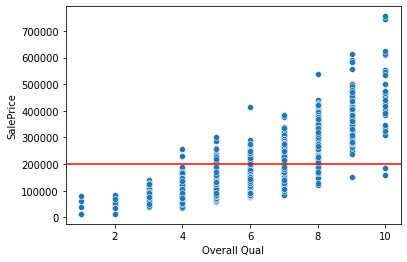

In [6]:
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')
plt.axhline(y=200000,color='r')

In [7]:
df[(df['Overall Qual']>8) &(df['SalePrice']<200000)][['SalePrice', 'Overall Qual']]

,SalePrice,Overall Qual
1182,150000,9
1498,160000,10
2180,183850,10
2181,184750,10


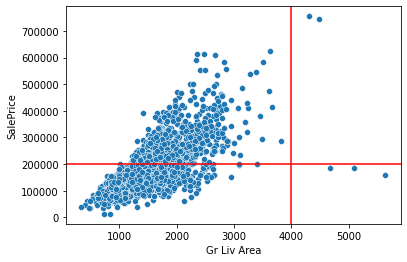

In [8]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

In [9]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)][['SalePrice', 'Gr Liv Area']]

,SalePrice,Gr Liv Area
1498,160000,5642
2180,183850,5095
2181,184750,4676


In [10]:
df_total=df

### **Remove the outliers**

In [11]:
index_drop=df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df=df.drop(index_drop, axis=0)

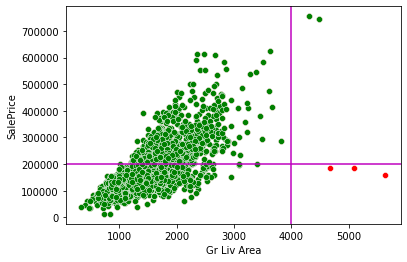

In [12]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_total, color='red')

sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, color='green')
plt.axhline(y=200000, color='m')
plt.axvline(x=4000, color='m')

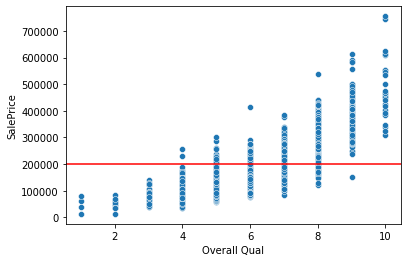

In [13]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)
plt.axhline(y=200000,color='r')

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

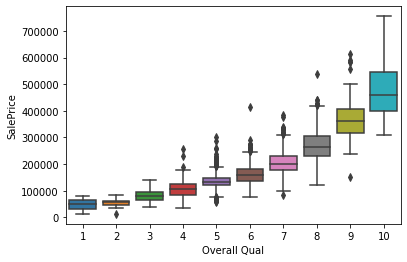

In [14]:
sns.boxplot(x='Overall Qual', y='SalePrice', data=df)

## **✔️ Dealing with Missing Data**

### **Fill/Keep/Drop?**

In [15]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Removing the PID (We already have an index, so we don't need PID unique identifier, becuase it doesn't have any information and can't help our learning models)**

In [16]:
df= df.drop('PID', axis=1)

### **1. How Much Data is Missing?**

In [17]:
df.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [18]:
df.isnull()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [19]:
df.isnull().sum()

Order               0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

**The percent of missing data in any feature:**

In [20]:
100*(df.isnull().sum()/len(df))

Order              0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 81, dtype: float64

**Make a Function to calculate the percent of missing data in each columns (feature) and then sort it**

In [21]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [22]:
nan_percent= missing_percent(df)

In [23]:
nan_percent

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

**plot the feature with missing indicating the percent of missing data:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Total Bsmt SF'),
  Text(3, 0, 'Bsmt Unf SF'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Qual'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

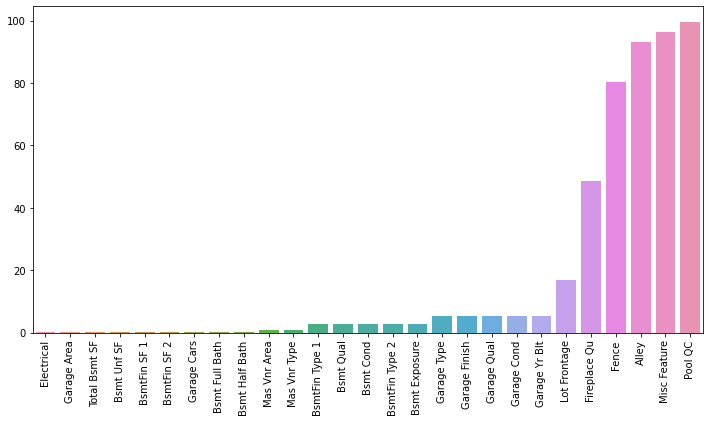

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

### **2. Working base on Rows Missing Data**

**every Feature with missing data must be checked!**

**We choose a threshold of 1%. It means, if there is less than 1% of a feature are missing,then we will consider just dropping that rows**

(0.0, 1.0)

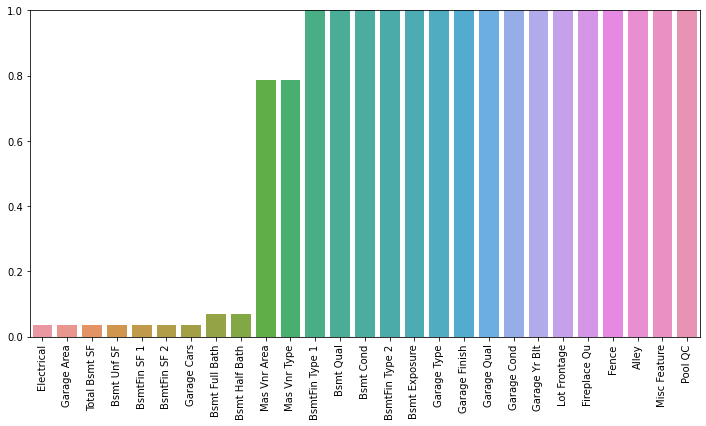

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

#Set 1% threshold:
plt.ylim(0,1)

In [26]:
nan_percent[nan_percent < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [27]:
nan_percent[nan_percent<1].index

Index(['Electrical', 'Garage Area', 'Total Bsmt SF', 'Bsmt Unf SF',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Garage Cars', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Mas Vnr Area', 'Mas Vnr Type'],
      dtype='object')

In [28]:
100/len(df)
#It shows that, Feature with just one missing rows has this percent value of missing data

0.0341646737273659

In [29]:
df[df['Electrical'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,1578,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [30]:
df[df['Garage Area'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,2237,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


**Dropping Rows:**

In [31]:
df= df.dropna(axis=0, subset=['Electrical', 'Garage Area'])

(0.0, 1.0)

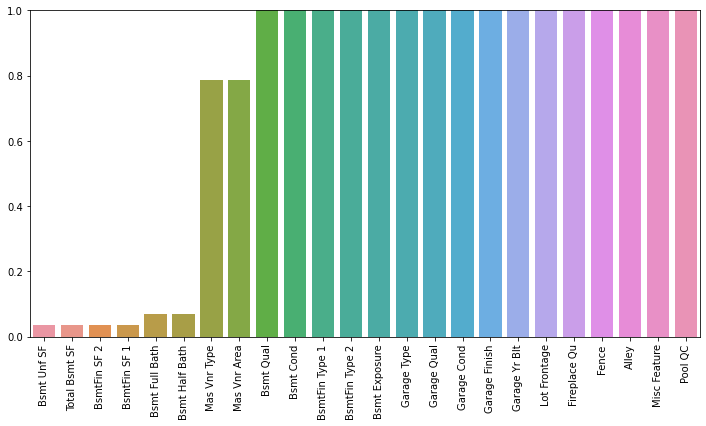

In [32]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

**Filling the missing values:**

**Features related to Basement:**

In [33]:
df[df['Total Bsmt SF'].isnull()]


,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [34]:
df[df['Bsmt Half Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [35]:
df[df['Bsmt Full Bath'].isnull()]

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


**After checking the data documentation, it shows that missing value (two rows) in Basement Features are becouse of there is no basement in these rows**

**Decision: Filling in data based on column: numerical basement & string descriptive:**


In [36]:
#Numerical Columns fill with 0:
bsmt_num_cols= ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF' ,'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

#String Columns fill with None:
bsmt_str_cols= ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols]= df[bsmt_str_cols].fillna('None')

(0.0, 1.0)

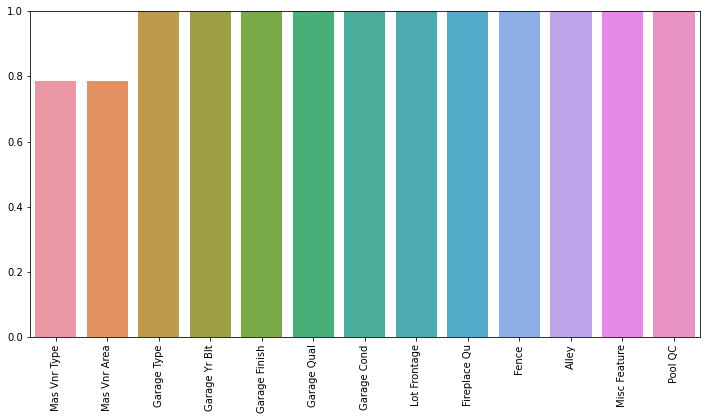

In [37]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

**Mas Vnr Features:**

In [38]:
df["Mas Vnr Type"]= df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"]= df["Mas Vnr Area"].fillna(0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

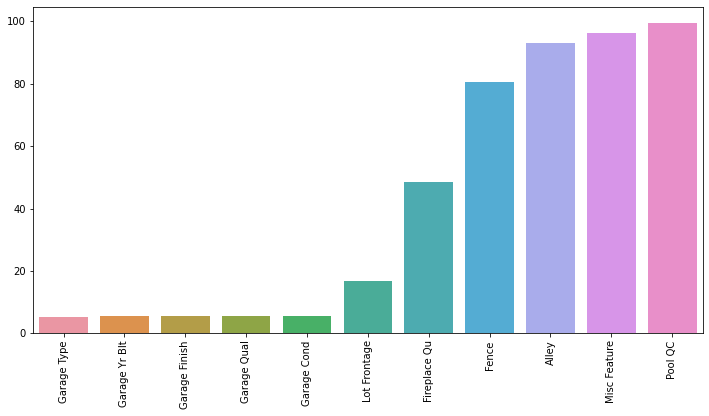

In [39]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

**Garage Columns:**

In [40]:
df[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,TA,TA
1,Attchd,1961.0,Unf,TA,TA
2,Attchd,1958.0,Unf,TA,TA
3,Attchd,1968.0,Fin,TA,TA
4,Attchd,1997.0,Fin,TA,TA
...,...,...,...,...,...
2925,Detchd,1984.0,Unf,TA,TA
2926,Attchd,1983.0,Unf,TA,TA
2927,NaN,NaN,NaN,NaN,NaN
2928,Attchd,1975.0,RFn,TA,TA


In [41]:
#Filling the missing Value:
Gar_str_cols= ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[Gar_str_cols]=df[Gar_str_cols].fillna('None')

df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

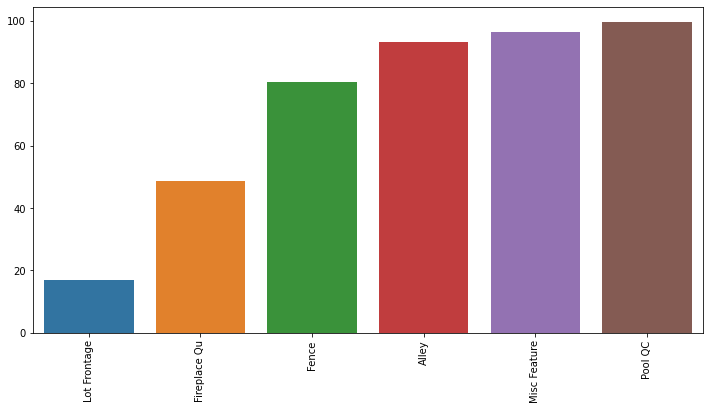

In [42]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

### **3. Working based on Columns Missing Data**

In [43]:
nan_percent.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [44]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [45]:
df= df.drop(['Fence', 'Alley', 'Misc Feature','Pool QC'], axis=1)

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

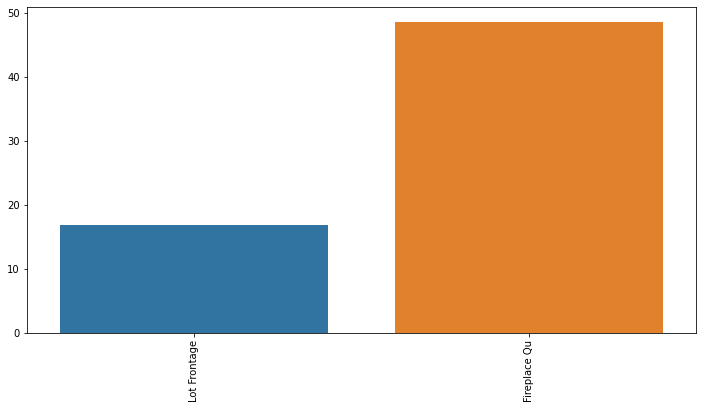

In [46]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

**Filling in Fireplace Quality based on dataset documentation:**

In [47]:
df['Fireplace Qu']= df['Fireplace Qu'].fillna('None')

(array([0]), [Text(0, 0, 'Lot Frontage')])

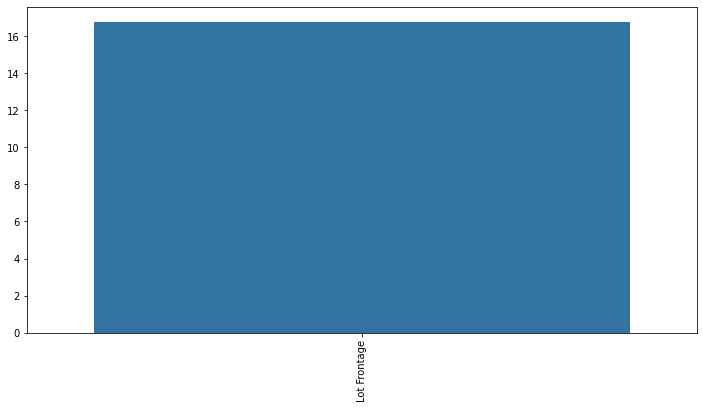

In [48]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

### **4. Imputation of Missing Data**

In [49]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

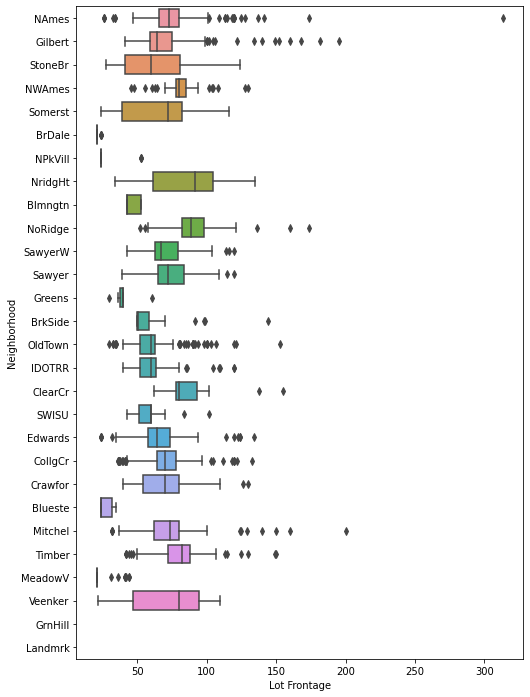

In [50]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood')

**Impute missing data based on other columns:**

In [51]:
df.groupby('Neighborhood')['Lot Frontage']

In [52]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [53]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [54]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

(array([0]), [Text(0, 0, 'Lot Frontage')])

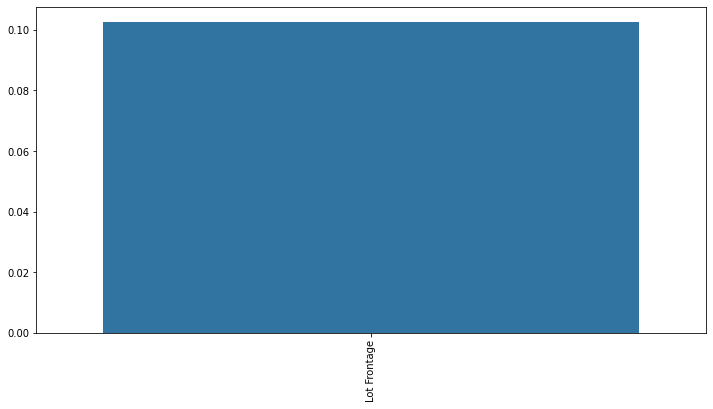

In [55]:
nan_percent= missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [56]:
df['Lot Frontage']= df['Lot Frontage'].fillna(0)

In [57]:
nan_percent= missing_percent(df)

In [58]:
nan_percent

Series([], dtype: float64)

## **Now, we don't have any Missing Data.**

## **✔️Dealing with Categorical Data**

### **1. Numerical Columns to Categorical**

**We need to be careful when it comes to encoding categorical as numbers. We want to make sure that the numerical relationship makes sense for model. For example, the encoding MSSubClass is essentially just a code per class**

In [59]:
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2925, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Neighborhood     2925 non-null   object 
 12  Condition 1      2925 non-null   object 
 13  Condition 2      2925 non-null   object 
 14  Bldg Type        2925 non-null   object 
 15  House Style      2925 non-null   object 
 16  Overall Qual     2925 non-null   int64  
 17  Overall Cond  

In [61]:
df['MS SubClass'].unique()

array([ 20,  60, 120,  50,  85, 160,  80,  30,  90, 190,  45,  70,  75,
        40, 180, 150])

**Convert to String:**

In [62]:
df['MS SubClass']= df['MS SubClass'].apply(str)

In [63]:
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2925, dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   MS SubClass      2925 non-null   object 
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Neighborhood     2925 non-null   object 
 12  Condition 1      2925 non-null   object 
 13  Condition 2      2925 non-null   object 
 14  Bldg Type        2925 non-null   object 
 15  House Style      2925 non-null   object 
 16  Overall Qual     2925 non-null   int64  
 17  Overall Cond  

**2. Creating Dummy Variables**

In [65]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [66]:
df_num= df.select_dtypes(exclude="object")
df_obj= df.select_dtypes(include="object")

In [67]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   Lot Frontage     2925 non-null   float64
 2   Lot Area         2925 non-null   int64  
 3   Overall Qual     2925 non-null   int64  
 4   Overall Cond     2925 non-null   int64  
 5   Year Built       2925 non-null   int64  
 6   Year Remod/Add   2925 non-null   int64  
 7   Mas Vnr Area     2925 non-null   float64
 8   BsmtFin SF 1     2925 non-null   float64
 9   BsmtFin SF 2     2925 non-null   float64
 10  Bsmt Unf SF      2925 non-null   float64
 11  Total Bsmt SF    2925 non-null   float64
 12  1st Flr SF       2925 non-null   int64  
 13  2nd Flr SF       2925 non-null   int64  
 14  Low Qual Fin SF  2925 non-null   int64  
 15  Gr Liv Area      2925 non-null   int64  
 16  Bsmt Full Bath   2925 non-null   float64
 17  Bsmt Half Bath

In [68]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qu

In [69]:
# Converting:
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [70]:
df_obj.shape

(2925, 238)

In [71]:
df_num.head()

,Order,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [72]:
Final_df= pd.concat([df_num, df_obj], axis=1)

In [73]:
Final_df.head()

,Order,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,3,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,4,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,5,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


## **Now, the Dataset is Ready for any Machine Learing Model & Analysis**

In [74]:
#save dataset
Final_df.to_csv('./House_Prices_prepare_data',index=False) 

# **Linear Regression**
**If you need to more explain about Linear Regression you can study my previous [notebook](https://www.kaggle.com/aminizahra/linear-regression).**

## **📤 Import Libraries**

In [75]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## **📈 Training a Linear Regression Model**

### **X and y arrays**

In [76]:
#Determine the feature and lable
X=Final_df.drop('SalePrice',axis=1)
y=Final_df['SalePrice']

## **🧱 Train Test Split**

In [77]:
#Split the dataset to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## **✔️ Train the model**

In [78]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **✔️ Model Evaluation**

**Coeficient Matrix:**

In [79]:
pd.DataFrame(model.coef_,X.columns,columns=["coeficient"])

,coeficient
Order,-5.539978
Lot Frontage,41.108887
Lot Area,0.806659
Overall Qual,6933.310780
Overall Cond,5070.916419
...,...
Sale Condition_AdjLand,20742.738242
Sale Condition_Alloca,9807.473127
Sale Condition_Family,3362.104133
Sale Condition_Normal,5906.436476


## **✔️ Predictions from our Model**

In [80]:
y_pred=model.predict(X_test)

In [81]:
#evaluating the model
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)

In [82]:
pd.DataFrame(data=[MAE,MSE,RMSE],index=["MAE","MSE","RMSE"],columns=["LinearRegression"])

,LinearRegression
MAE,1.588974e+04
MSE,5.936506e+08
RMSE,2.436495e+04


## **✔️ Residuals**

In [83]:
test_residuals=y_test-y_pred#the residuals should be random and close to normal distribution.

Text(0, 0.5, 'Y-Pred')

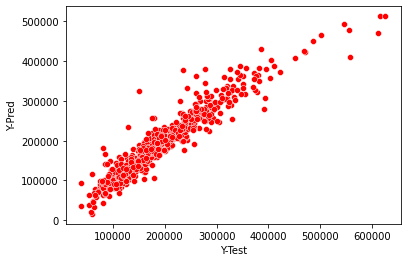

In [84]:
sns.scatterplot(x=y_test,y=y_pred,color="r")
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

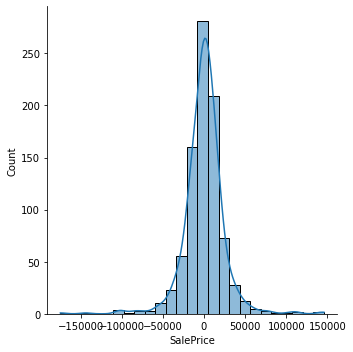

In [85]:
sns.displot(test_residuals, bins=25, kde=True)

Text(0, 0.5, 'residuals')

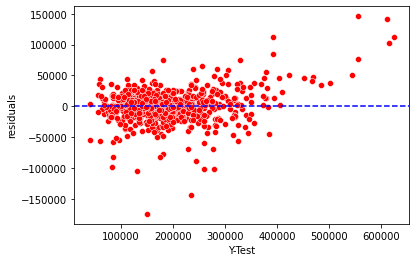

In [86]:
sns.scatterplot(x=y_test,y=test_residuals,color="r")#test residuals should not show a clear pattern.
plt.axhline(y=0,color="b",ls="--")
plt.xlabel('Y-Test')
plt.ylabel('residuals')

# **Regularization**

**If you need to more explain about Regularization you can study my previous [notebook](https://www.kaggle.com/aminizahra/regularization-ridge-lasso-elasticnet).**

### **📤 Import Libraries**

In [87]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import RidgeCV

from sklearn.linear_model import LassoCV

from sklearn.linear_model import ElasticNetCV

## **Regularization**

# **1. Ridge Regression**

In [88]:
ridge_model=Ridge(alpha=10)

In [89]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [90]:
y_pred=ridge_model.predict(X_test)

In [91]:
MAE3=metrics.mean_absolute_error(y_test,y_pred)
MSE3=metrics.mean_squared_error(y_test,y_pred)
RMSE3=np.sqrt(MSE3)

In [92]:
data={'LinearRegression':[MAE,MSE,RMSE],"Ridge regression":[MAE3,MSE3,RMSE3]}
pd.DataFrame(data,index=["MAE","MSE","RMSE"])

,LinearRegression,Ridge regression
MAE,1.588974e+04,1.542414e+04
MSE,5.936506e+08,5.576400e+08
RMSE,2.436495e+04,2.361440e+04


#### **✔️ Ridge Regression (Choosing an alpha value with Cross-Validation)**

In [93]:
ridge_cv_model=RidgeCV(alphas=(0.1, 4.0, 10.0),scoring="neg_mean_absolute_error")

In [94]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  4. , 10. ]), scoring='neg_mean_absolute_error')

In [95]:
ridge_cv_model.alpha_

4.0

In [96]:
y_pred_ridge=ridge_cv_model.predict(X_test)

In [97]:
MAE4=metrics.mean_absolute_error(y_test,y_pred_ridge)
MSE4=metrics.mean_squared_error(y_test,y_pred_ridge)
RMSE4=np.sqrt(MSE4)

In [98]:
data={'LinearRegression':[MAE,MSE,RMSE],"Ridge regression":[MAE3,MSE3,RMSE3],"Ridgecv":[MAE4,MSE4,RMSE4]}
pd.DataFrame(data,index=["MAE","MSE","RMSE"])

,LinearRegression,Ridge regression,Ridgecv
MAE,1.588974e+04,1.542414e+04,1.534925e+04
MSE,5.936506e+08,5.576400e+08,5.534110e+08
RMSE,2.436495e+04,2.361440e+04,2.352469e+04


## **Regularization**
# **2. Lasso regression**

In [99]:
lasso_cv_model=LassoCV(eps=0.1,n_alphas=100,cv=5)

In [100]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [101]:
lasso_cv_model.alpha_

17559218.681708485

In [102]:
y_pred_lasso=lasso_cv_model.predict(X_test)

In [103]:
MAE5=metrics.mean_absolute_error(y_test,y_pred_lasso)
MSE5=metrics.mean_squared_error(y_test,y_pred_lasso)
RMSE5=np.sqrt(MSE5)

In [104]:
data={'LinearRegression':[MAE,MSE,RMSE],"Ridge regression":[MAE3,MSE3,RMSE3],"Ridgecv":[MAE4,MSE4,RMSE4],"Lassocv":[MAE5,MSE5,RMSE5]}
pd.DataFrame(data,index=["MAE","MSE","RMSE"])

,LinearRegression,Ridge regression,Ridgecv,Lassocv
MAE,1.588974e+04,1.542414e+04,1.534925e+04,4.581983e+04
MSE,5.936506e+08,5.576400e+08,5.534110e+08,4.335338e+09
RMSE,2.436495e+04,2.361440e+04,2.352469e+04,6.584328e+04


## **Regularization**
# **3. Elastic Net**

In [105]:
elastic_model=ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99,1],cv=5,max_iter=100000)

In [106]:
elastic_model.fit(X_train,y_train)
elastic_model.l1_ratio_

1.0

In [107]:
y_pred_elastic=elastic_model.predict(X_test)

In [108]:
MAE6=metrics.mean_absolute_error(y_test,y_pred_elastic)
MSE6=metrics.mean_squared_error(y_test,y_pred_elastic)
RMSE6=np.sqrt(MSE6)

In [109]:
data={'LinearRegression':[MAE,MSE,RMSE],"Ridge regression":[MAE3,MSE3,RMSE3],"Ridgecv":[MAE4,MSE4,RMSE4],"Lassocv":[MAE5,MSE5,RMSE5],"elasticnet":[MAE6,MSE6,RMSE6]}
pd.DataFrame(data,index=["MAE","MSE","RMSE"])

,LinearRegression,Ridge regression,Ridgecv,Lassocv,elasticnet
MAE,1.588974e+04,1.542414e+04,1.534925e+04,4.581983e+04,2.564632e+04
MSE,5.936506e+08,5.576400e+08,5.534110e+08,4.335338e+09,1.426429e+09
RMSE,2.436495e+04,2.361440e+04,2.352469e+04,6.584328e+04,3.776809e+04


# Oh, finished. You can copy this notebook and start practice.